### Author : Jayalakshmi K
### mail id :jayaneethipathy@gmail.com


# 1 - AI/ML/CV/OCR:
##  Objective: Develop software to interpret data from multipara monitors via video feed, adaptable across monitor models.
###  Tech Stack: Python, OpenCV, PyTesseract (flexible).
## Task 1:
Detection of Data Display Areas: Identify critical data areas (HR, ECG, oxygen levels) on varying monitor screens.
## Task 2:
Detection of Displayed Values: Use OCR to digitize the numeric values of heart rate and oxygen saturation from the identified
areas.

## Task 1

In [1]:
import cv2
import numpy as np
import pytesseract
from IPython.display import display, Image, HTML

def display_image_with_title(image, title):
    # Convert the image from BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Display the image with the specified title
    display(HTML(f"<h3>{title}</h3>"))
    display(Image(data=cv2.imencode('.png', image_rgb)[1].tobytes()))


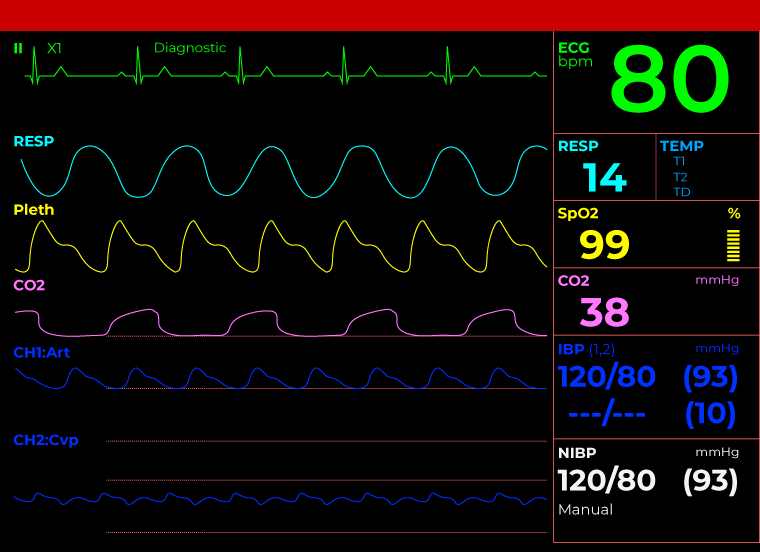

In [2]:
# Load monitor screen image
monitor_screen = cv2.imread(".\Photos\image.png")

# Convert monitor screen to grayscale
monitor_screen_gray = cv2.cvtColor(monitor_screen, cv2.COLOR_BGR2GRAY)

display_image_with_title(monitor_screen,"Test Image")

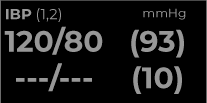

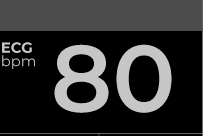

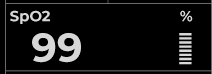

In [3]:
# Load template images for HR, ECG, and oxygen levels
template_hr = cv2.imread(r"./Photos/templete_HR.png", cv2.IMREAD_GRAYSCALE)  
template_ecg = cv2.imread(r"./Photos/templete_ECG.png", cv2.IMREAD_GRAYSCALE)
template_oxygen = cv2.imread(r"./Photos/templete_O2Sat.png", cv2.IMREAD_GRAYSCALE) 

display_image_with_title(template_hr,"templete HR Image")
display_image_with_title(template_ecg,"templete ECG Image")
display_image_with_title(template_oxygen,"template_oxygen Image")



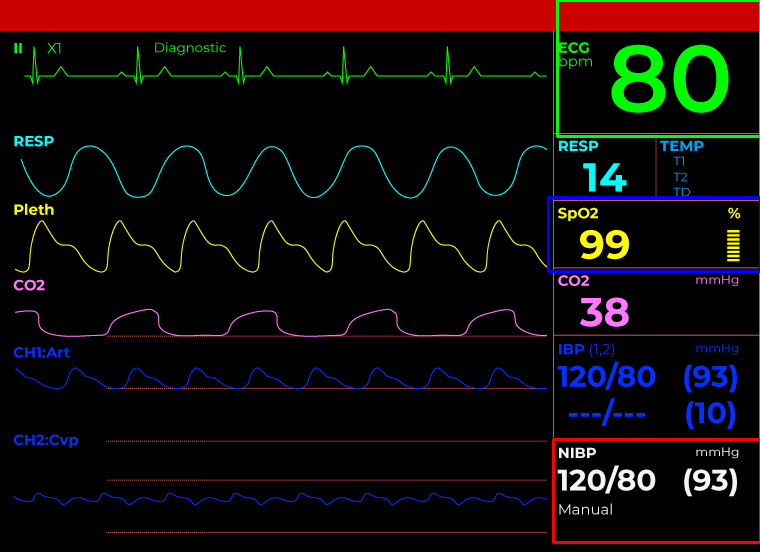

In [5]:

# Function to detect template matches
def detect_template_matches(screen, template):
    result = cv2.matchTemplate(screen, template, cv2.TM_CCORR)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    return max_val, max_loc

# Define a function to draw bounding boxes around detected regions
def draw_roi(image, loc, template_shape, color):
    x, y = loc
    cv2.rectangle(image, (x, y), (x + template_shape[1], y + template_shape[0]), color, 2)

# Detect HR, ECG, and oxygen level regions
hr_score, hr_loc = detect_template_matches(monitor_screen_gray, template_hr)
ecg_score, ecg_loc = detect_template_matches(monitor_screen_gray, template_ecg)
oxygen_score, oxygen_loc = detect_template_matches(monitor_screen_gray, template_oxygen)

# Draw bounding boxes around detected regions
if hr_loc:
    draw_roi(monitor_screen, hr_loc, template_hr.shape, (255, 0, 0))

if ecg_loc:
    draw_roi(monitor_screen, ecg_loc, template_ecg.shape, (0, 255, 0))

if oxygen_loc:
    draw_roi(monitor_screen, oxygen_loc, template_oxygen.shape, (0, 0, 255))

# Display the monitor screen image with bounding boxes
cv2.imshow("Monitor Screen with ROIs", monitor_screen)

cv2.waitKey(0)
cv2.destroyAllWindows()
display_image_with_title(monitor_screen,"Monitor Screen with ROIs")


In [6]:


# using hr_loc, ecg_loc, and oxygen_loc are tuples containing the top-left coordinates of the respective ROIs
hr_x, hr_y = hr_loc
hr_roi = monitor_screen[hr_y:hr_y+template_hr.shape[0], hr_x:hr_x+template_hr.shape[1]]

ecg_x, ecg_y = ecg_loc
ecg_roi = monitor_screen[ecg_y:ecg_y+template_ecg.shape[0], ecg_x:ecg_x+template_ecg.shape[1]]

oxygen_x, oxygen_y = oxygen_loc
oxygen_roi = monitor_screen[oxygen_y:oxygen_y+template_oxygen.shape[0], oxygen_x:oxygen_x+template_oxygen.shape[1]]

# Convert HR ROI to grayscale
hr_roi_gray = cv2.cvtColor(hr_roi, cv2.COLOR_BGR2GRAY)

# Perform OCR on HR ROI
try:
    hr_text = pytesseract.image_to_string(hr_roi_gray)
except pytesseract.TesseractError as e:
    print("Error during OCR for HR:", e)
    hr_text = ""

# Convert ECG ROI to grayscale
ecg_roi_gray = cv2.cvtColor(ecg_roi, cv2.COLOR_BGR2GRAY)

# Perform OCR on ECG ROI
try:
    ecg_text = pytesseract.image_to_string(ecg_roi_gray)
except pytesseract.TesseractError as e:
    print("Error during OCR for ECG:", e)
    ecg_text = ""

# Convert oxygen level ROI to grayscale
oxygen_roi_gray = cv2.cvtColor(oxygen_roi, cv2.COLOR_BGR2GRAY)

# Perform OCR on oxygen level ROI
try:
    oxygen_text = pytesseract.image_to_string(oxygen_roi_gray)
except pytesseract.TesseractError as e:
    print("Error during OCR for oxygen level:", e)
    oxygen_text = ""

# Display the extracted text
print("Heart Rate (HR):", hr_text)
print("ECG:", ecg_text)
print("Oxygen Saturation (O2Sat):", oxygen_text)


Heart Rate (HR): NIBP mmHg

120/80 (93)

Manual

ECG: Bm 80


Oxygen Saturation (O2Sat): spo2

99


